In [1]:
#this file is used to create the spectrograms

import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile
from scipy import signal
from scipy.fft import fftshift
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import butter,filtfilt
import librosa
import librosa.display


In [2]:
#low-pass filtering function
def butter_lowpass_filter(data, cutoff, fs, order):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    # Get the filter coefficients 
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y

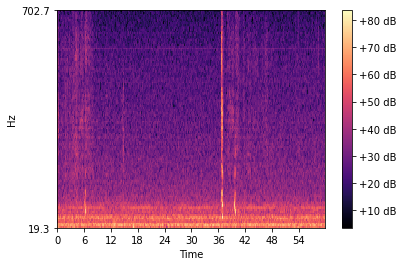

In [10]:
Fs, samples = wavfile.read('./final_project/data/final_data/00001010-100507.wav') #open audio file
total_seconds = int(len(samples)/Fs)

for second in range(0, total_seconds-60, 1): #go through every second rolling window
    
    x = samples[(second)*Fs:(second+60)*Fs] #take out the selected minute

    cutoff = 1000 #define filter cutoff frequency (1000Hz)
    order = 5 #define filter order
    x_filtered = butter_lowpass_filter(x, cutoff, Fs, order) #low-pass filtering

    x_downsampled = signal.resample(x_filtered, 2048*60) #downsample the function to 2kHz
    new_Fs = 2048
    
    n_fft = 512 #length of fft

    sgram = librosa.stft(x_downsampled, center=False, n_fft=n_fft)
    sgram_mag, _ = librosa.magphase(sgram)
    mel_scale_sgram = librosa.feature.melspectrogram(S=sgram_mag, sr=new_Fs, n_fft=n_fft)
    mel_sgram = librosa.amplitude_to_db(mel_scale_sgram, ref=np.min)
    #for raw graphs to save
    #librosa.display.specshow(mel_sgram, sr=Fs, n_fft=n_fft, fmin=22, fmax=700)
    #for graphs with axis and scale
    librosa.display.specshow(mel_sgram, sr=new_Fs*4, x_axis='time', y_axis='mel', n_fft=n_fft, fmin=22, fmax=700)
    plt.colorbar(format='%+2.0f dB')

    plt.savefig('./patient6/00001010-100507' + '_' + str(second) + '.jpg')
    plt.close()